                                                                                                                                        Song Name  Days  Top 10 (xTimes)  Peak Position  Peak Streams  Total Streams
11083                                                                                                                               Z  Holy Grail     1              0.0            184         44323          44323
11082                                                                                                                             Somebody To You     1              0.0            200         44962          44962
11081                                                                                                                                      It  23     1              0.0            167         46547          46547
11080                                                                                                                             Not a Bad Thing   

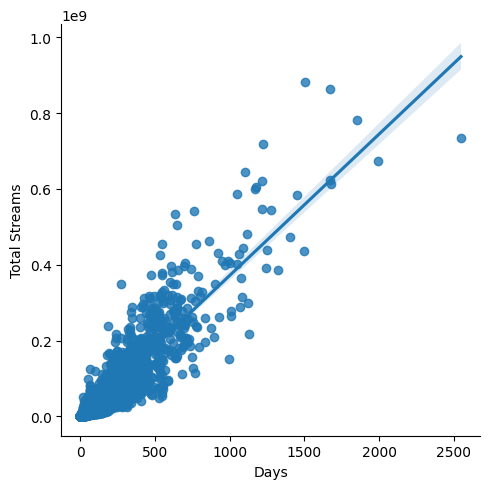

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("spotify\spotify.csv")

df.drop(['Artist Name','Peak Position (xTimes)','Position'], axis=1, inplace=True)

df = df.replace(to_replace='NaN', value=0)

df = df.sort_values(by=['Total Streams'])

print(df.to_string())

df = df.set_index(['Song Name'])

sns.lmplot(x="Days",y="Total Streams", data = df)

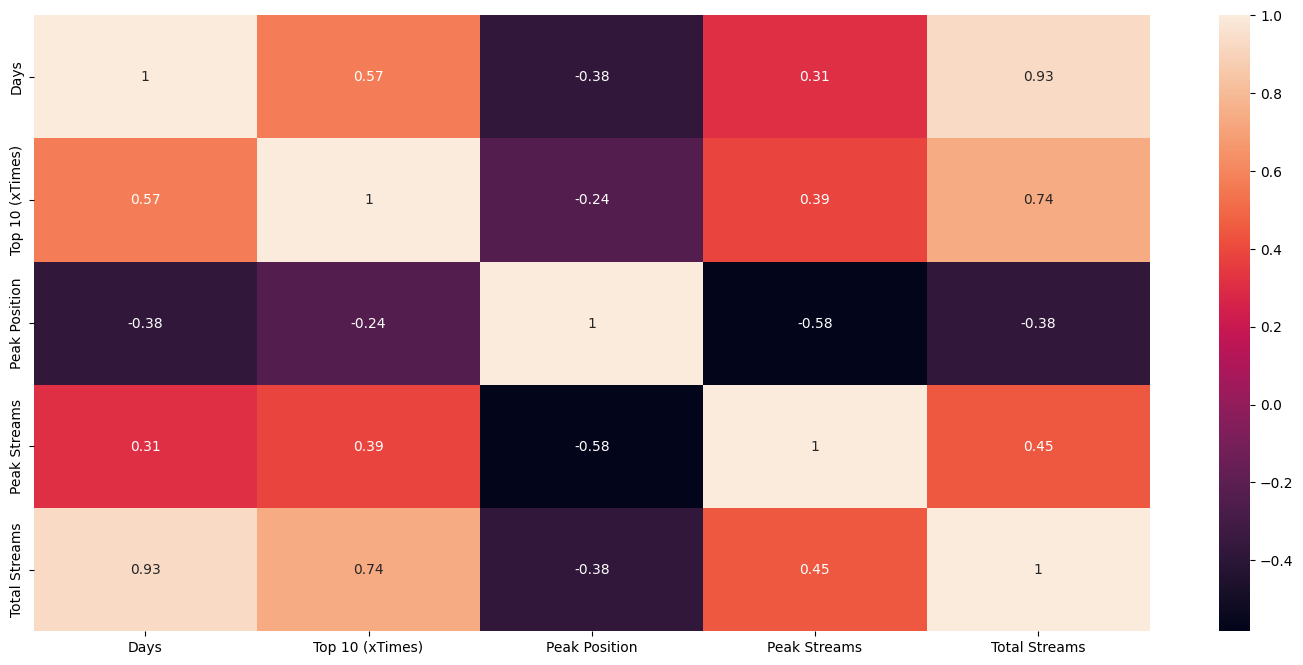

In [ ]:
df.corr()

plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(df.corr(), annot = True)

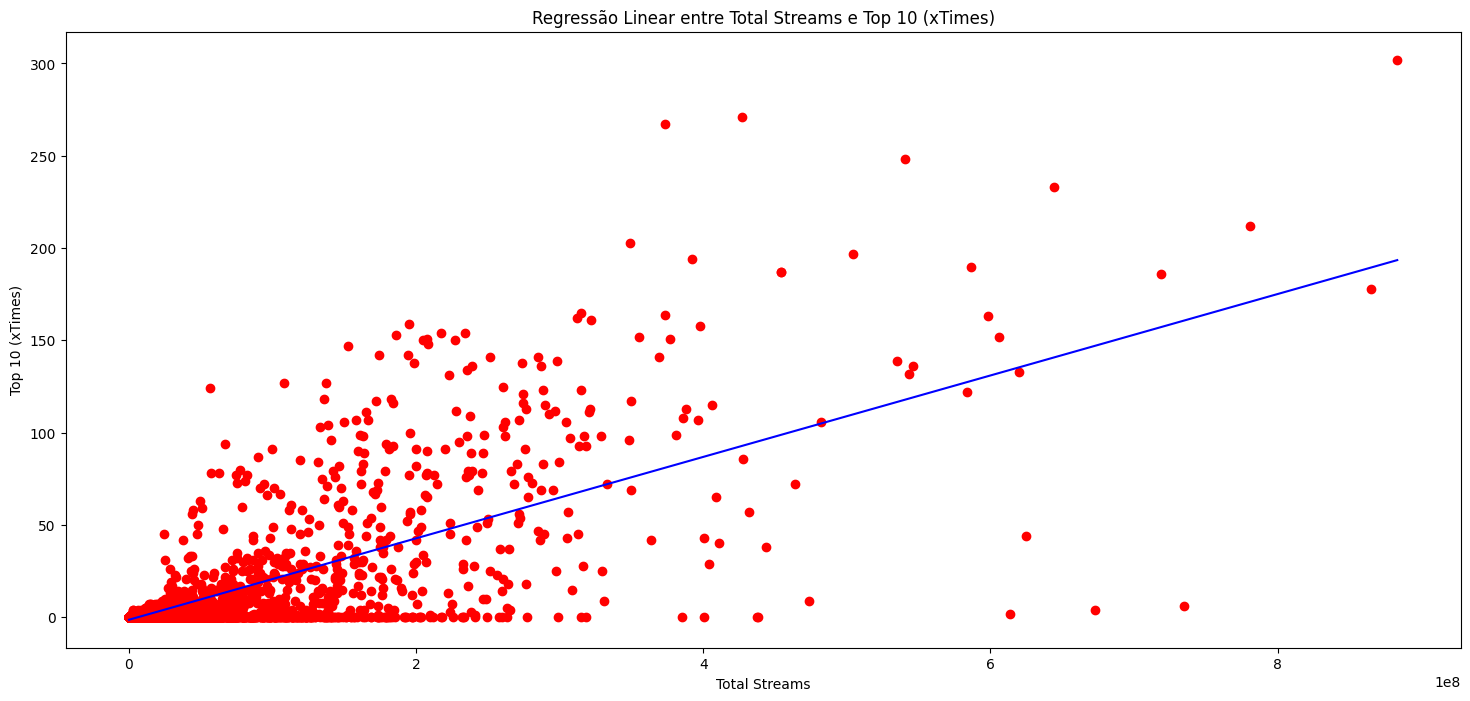

In [6]:
modelo = LinearRegression()
X = df[['Total Streams']] 
y = df['Top 10 (xTimes)']  
modelo.fit(X, y)

# Coeficiente e intercepto
a_coeff = modelo.coef_[0]
l_coeff = modelo.intercept_

# Criação do gráfico de dispersão e da linha de regressão
plt.scatter(df['Total Streams'], df['Top 10 (xTimes)'], color='red')
plt.plot(df['Total Streams'], l_coeff + a_coeff * df['Total Streams'], color='blue')
plt.xlabel('Total Streams')
plt.ylabel('Top 10 (xTimes)')
plt.title('Regressão Linear entre Total Streams e Top 10 (xTimes)')
plt.show()